<a href="https://colab.research.google.com/github/PROMITAGHOSH12/IBM-HR-ATTRITION-DATA/blob/main/ML_ON_IBM_HR_ATTRITION_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  classification_report

from sklearn.svm import SVC
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**READ DATASET**

In [2]:
df=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv")

In [3]:
df.head

<bound method NDFrame.head of       Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 35 columns]>

In [4]:
df.isnull().any

<bound method DataFrame.any of         Age  Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0     False      False  ...                    False                 False
1     False      False  ...                    False                 False
2     False      False  ...                    False                 False
3     False      False  ...                    False                 False
4     False      False  ...                    False                 False
...     ...        ...  ...                      ...                   ...
1465  False      False  ...                    False                 False
1466  False      False  ...                    False                 False
1467  False      False  ...                    False                 False
1468  False      False  ...                    False                 False
1469  False      False  ...                    False                 False

[1470 rows x 35 columns]>

In [5]:
pd.DataFrame(
    df.columns, 
    columns = ['Column Names'],
    index = range(1, len(df.columns)+1, 1)
)

,Column Names
1,Age
2,Attrition
3,BusinessTravel
4,DailyRate
5,Department
6,DistanceFromHome
7,Education
8,EducationField
9,EmployeeCount
10,EmployeeNumber


In [6]:
df.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
print(df.isna().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

**DROP COLUMN**

In [9]:
df = df.drop(
    columns = [ "EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"],
    axis = 1
)

**EDA**

In [10]:
col_feats = []
for i in df.columns:
    col_feats.append([i, df[i].nunique(), df[i].drop_duplicates().values])
pd.DataFrame(col_feats, columns = ['Columns', 'Number of Unique Values', 'Unique Values'])

,Columns,Number of Unique Values,Unique Values
0,Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,2,"[Yes, No]"
2,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,5,"[2, 1, 4, 3, 5]"
7,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EnvironmentSatisfaction,4,"[2, 3, 4, 1]"
9,Gender,2,"[Female, Male]"


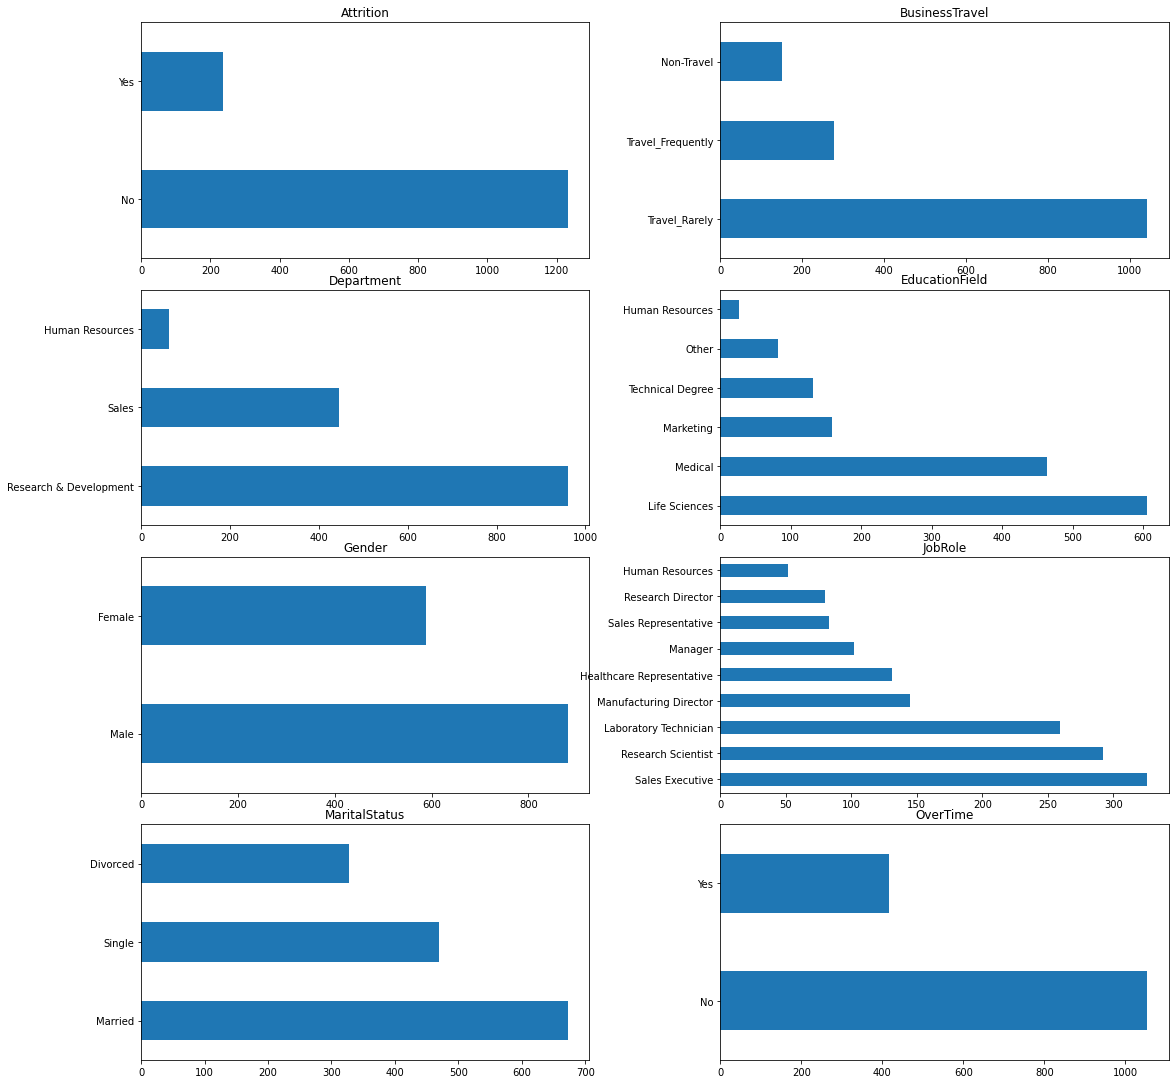

In [11]:
categorical_columns = df.select_dtypes(include= 'object').columns
fig, ax = plt.subplots(4,2, figsize = (15,15))
fig.tight_layout(w_pad = 10.0)
axs = ax.ravel()
for i, column in enumerate(categorical_columns):
    df[column].value_counts().plot.barh(ax = axs[i])
    axs[i].set_title(column)   



1.   Most of the employees are married

2.  Most of the employees not left the company
3. Most of the employees travel rarely
4. Most of the employees are male.
5. Less employee work over time
6. Most of the employees work in sales executive
7. Most of employees are from life science.
8.  Most of the employee work in research and devlopment field. 



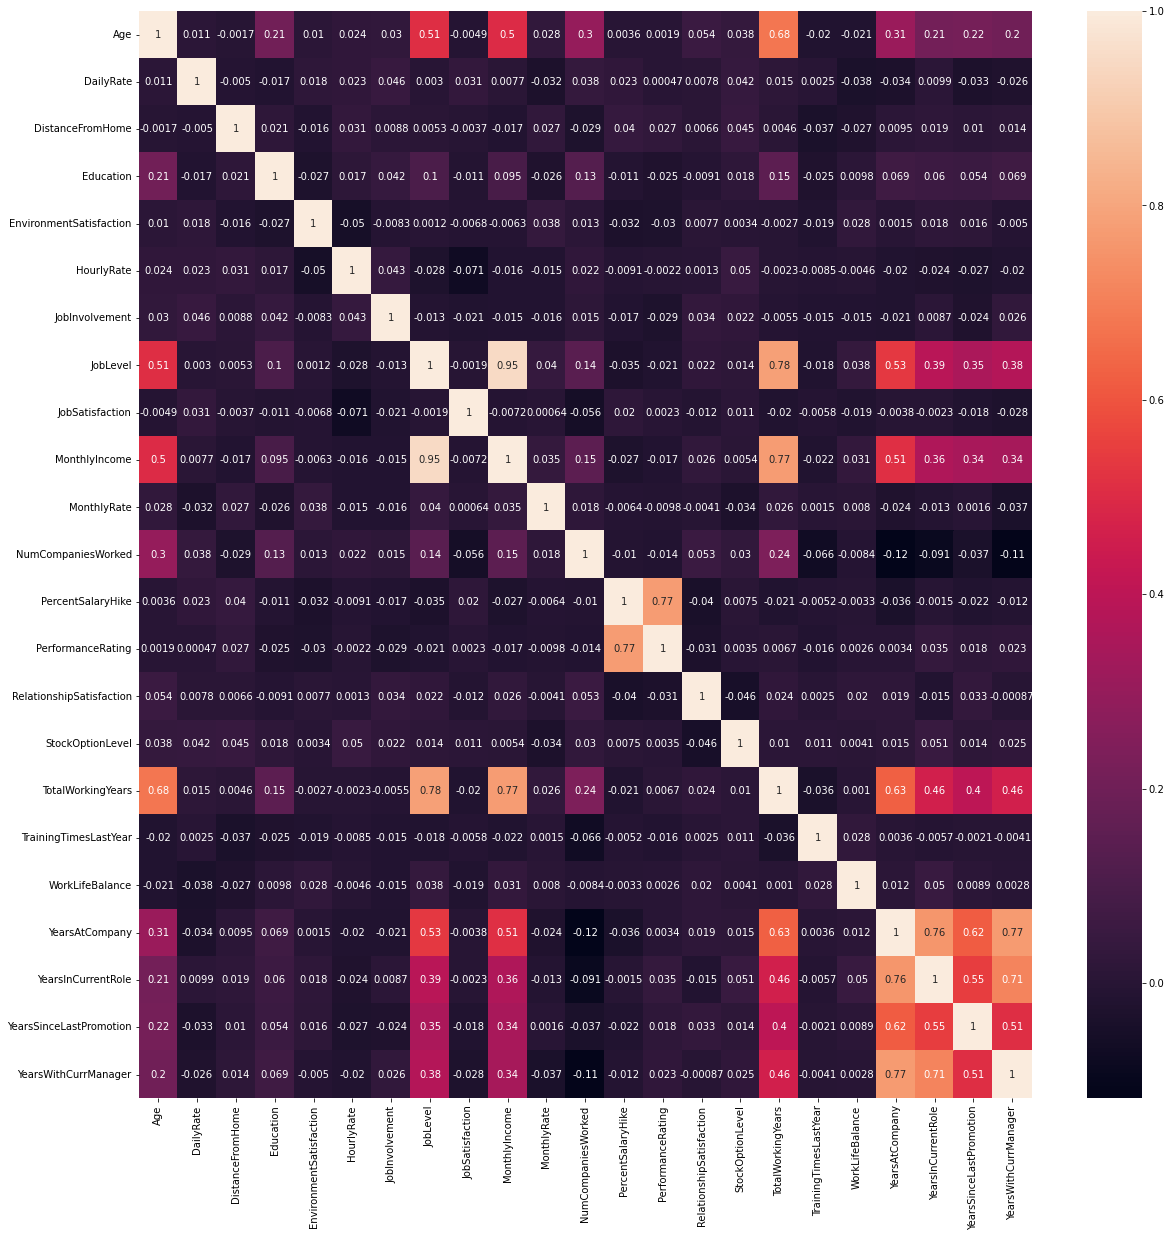

In [12]:
numerical_columns = df.columns[df.dtypes!='object']
plt.figure(figsize=(20, 20)) ; 
sns.heatmap(df[numerical_columns].corr(), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fae53e410>,
      dtype=object)

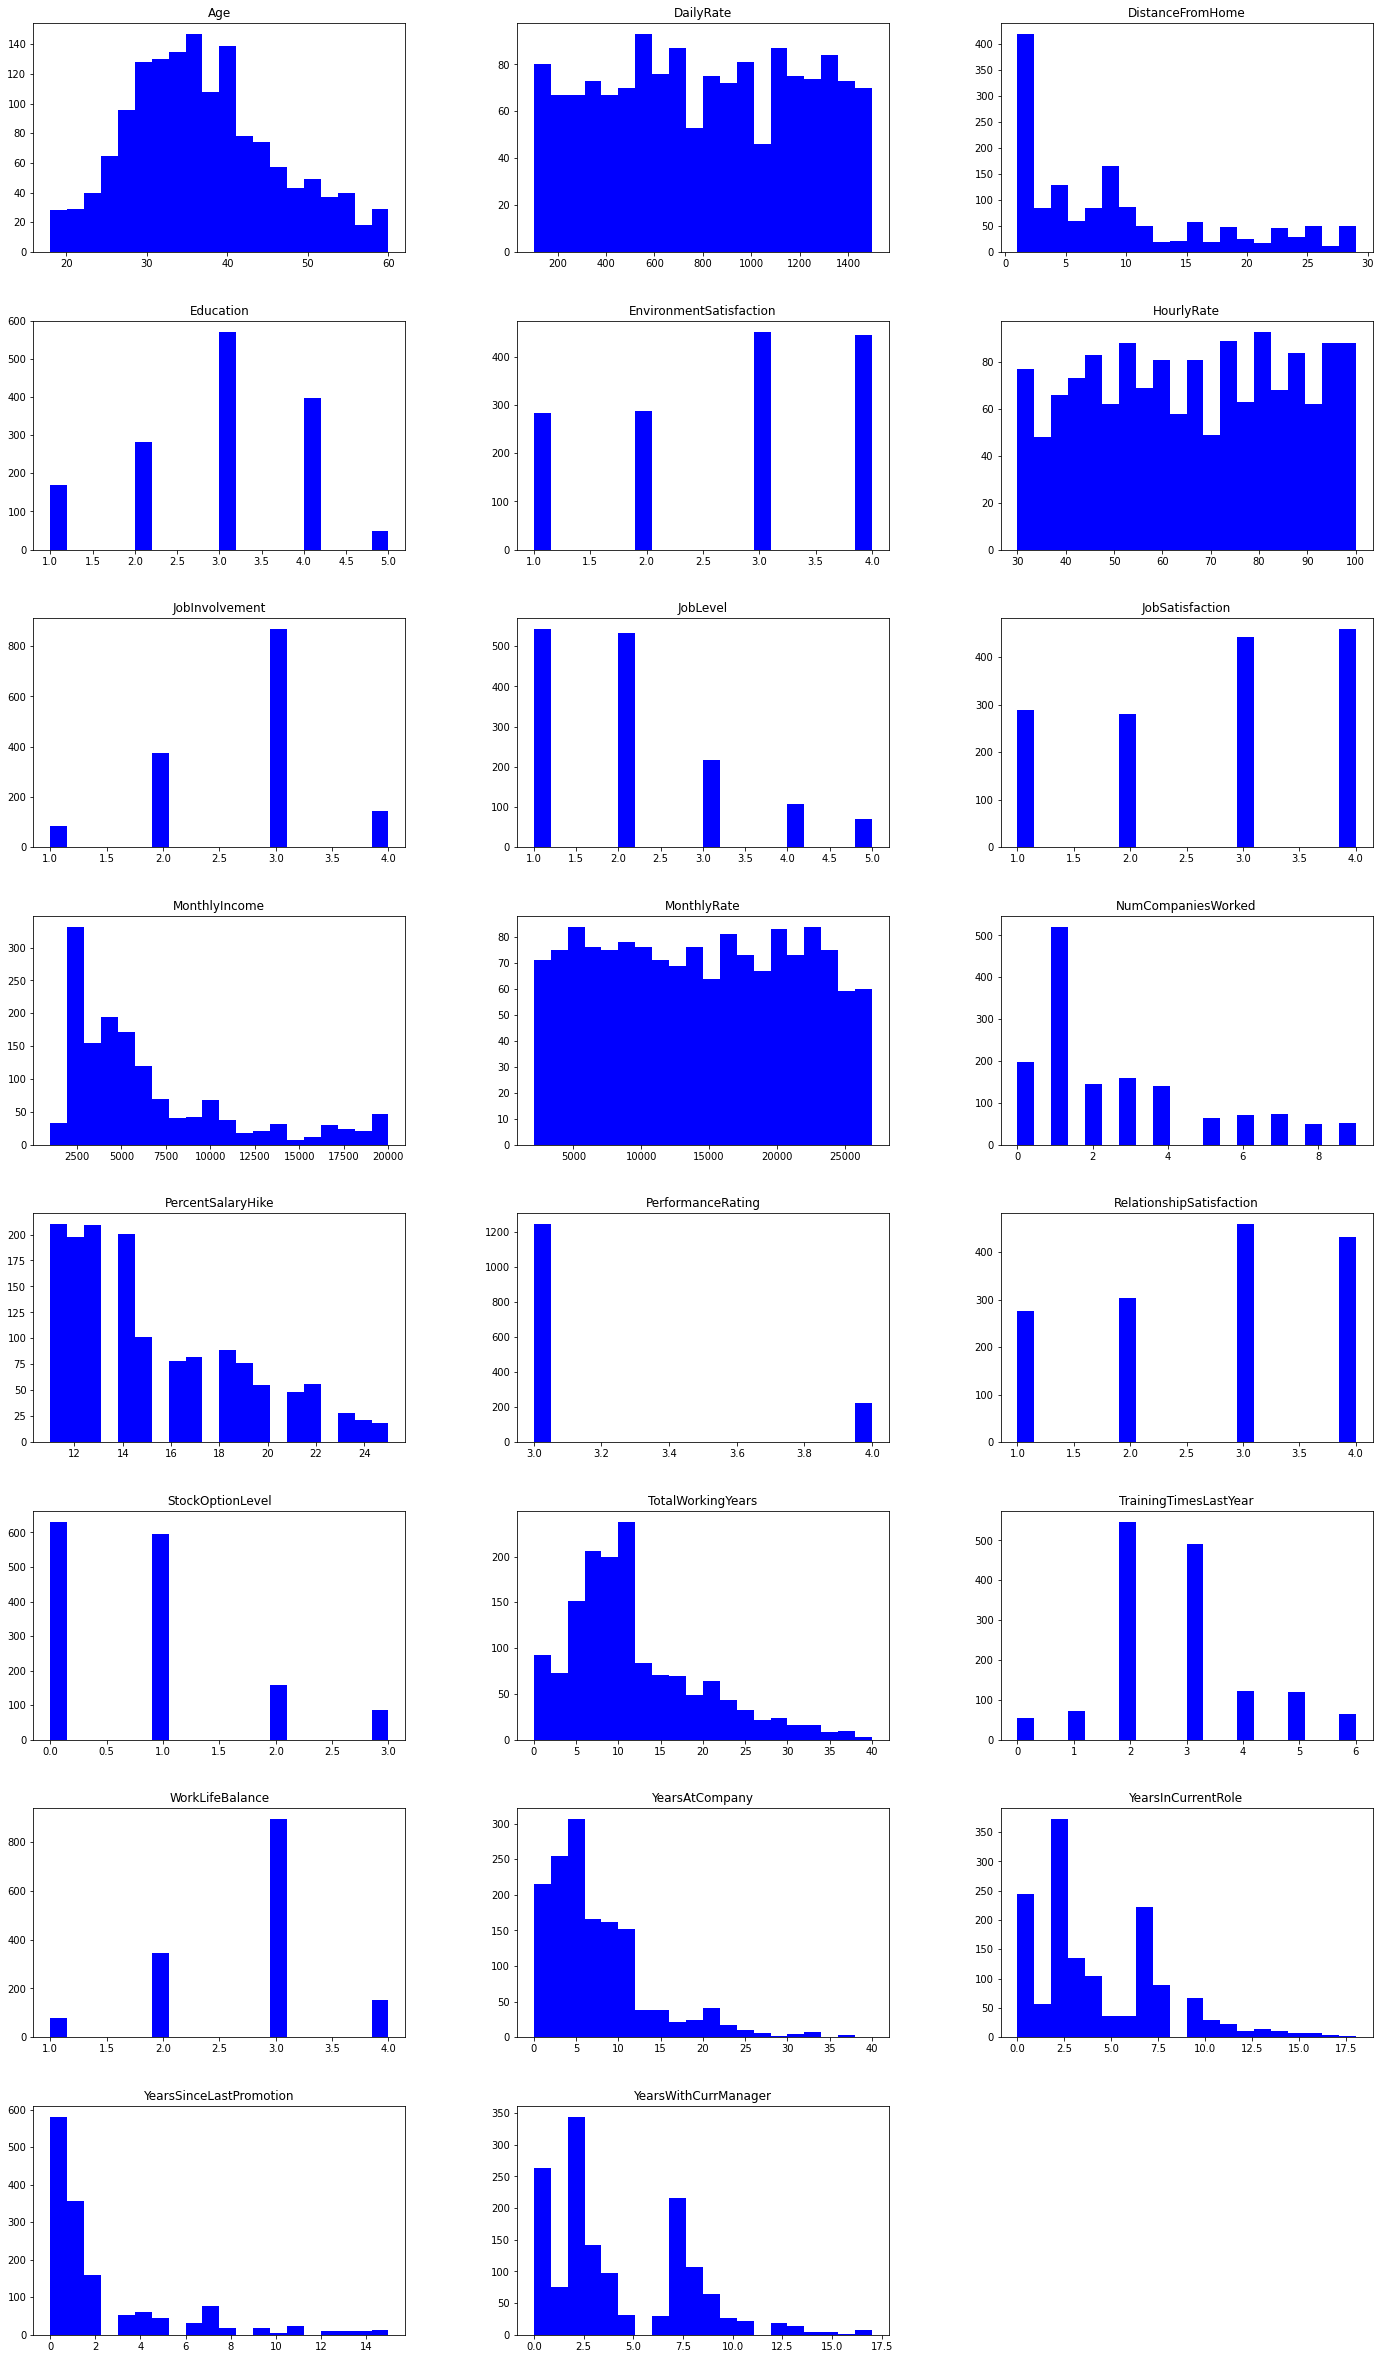

In [13]:
df[numerical_columns].hist(
    layout = (9, 3),
    figsize=(24, 48),
    color='blue',
    grid=False,
    bins=20
)

Age                            AxesSubplot(0.125,0.749828;0.133621x0.130172)
DailyRate                   AxesSubplot(0.285345,0.749828;0.133621x0.130172)
DistanceFromHome             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Education                   AxesSubplot(0.606034,0.749828;0.133621x0.130172)
EnvironmentSatisfaction     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
HourlyRate                     AxesSubplot(0.125,0.593621;0.133621x0.130172)
JobInvolvement              AxesSubplot(0.285345,0.593621;0.133621x0.130172)
JobLevel                     AxesSubplot(0.44569,0.593621;0.133621x0.130172)
JobSatisfaction             AxesSubplot(0.606034,0.593621;0.133621x0.130172)
MonthlyIncome               AxesSubplot(0.766379,0.593621;0.133621x0.130172)
MonthlyRate                    AxesSubplot(0.125,0.437414;0.133621x0.130172)
NumCompaniesWorked          AxesSubplot(0.285345,0.437414;0.133621x0.130172)
PercentSalaryHike            AxesSubplot(0.44569,0.437414;0.133621x0.130172)

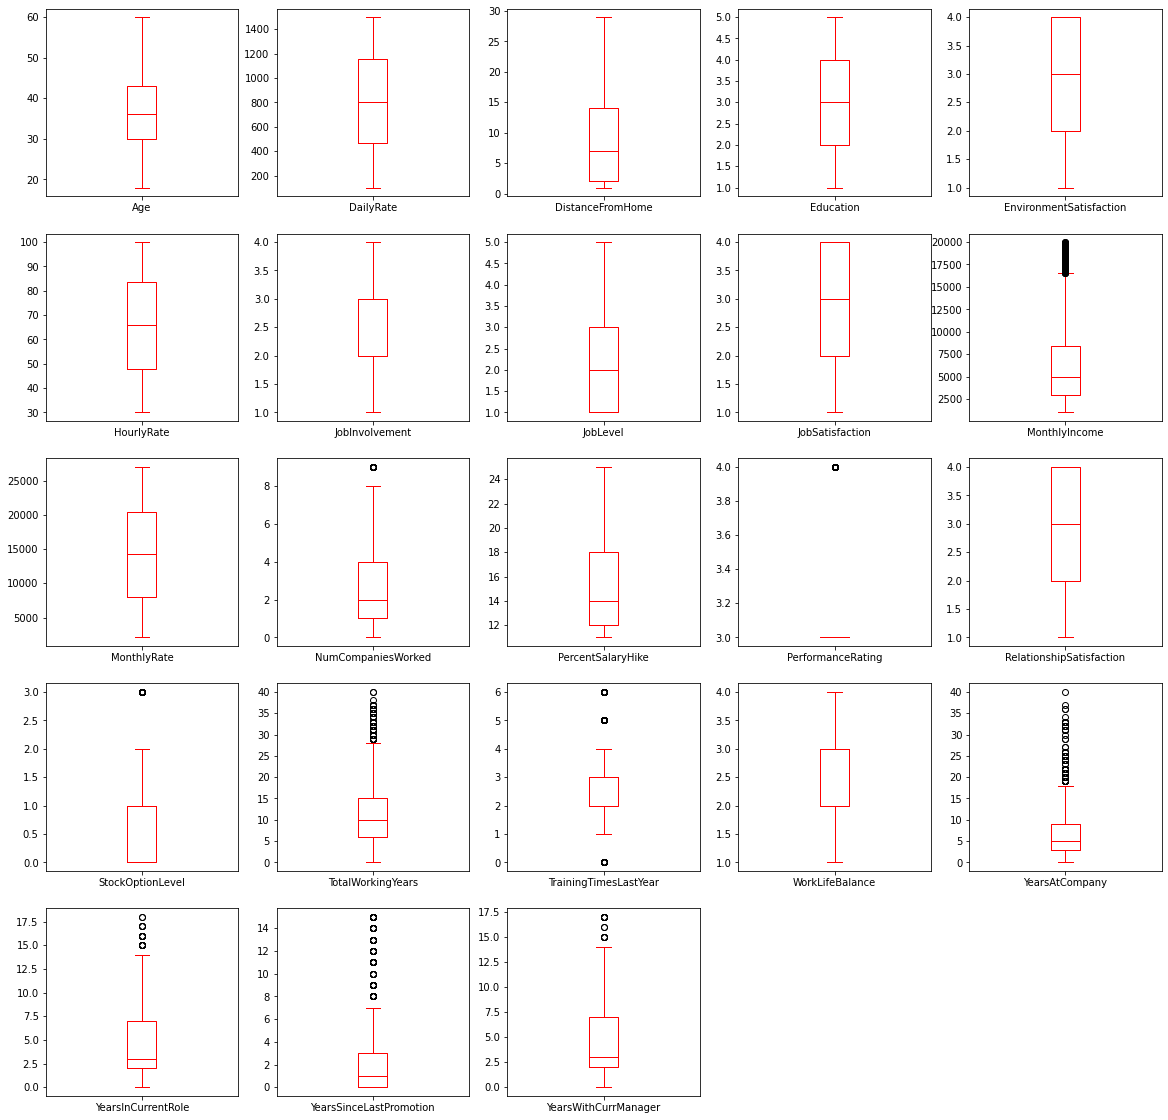

In [14]:
df[numerical_columns].plot(
    kind="box",
    subplots = True,
    layout = (5,5),
    figsize=(20,20),
    color='red'
)

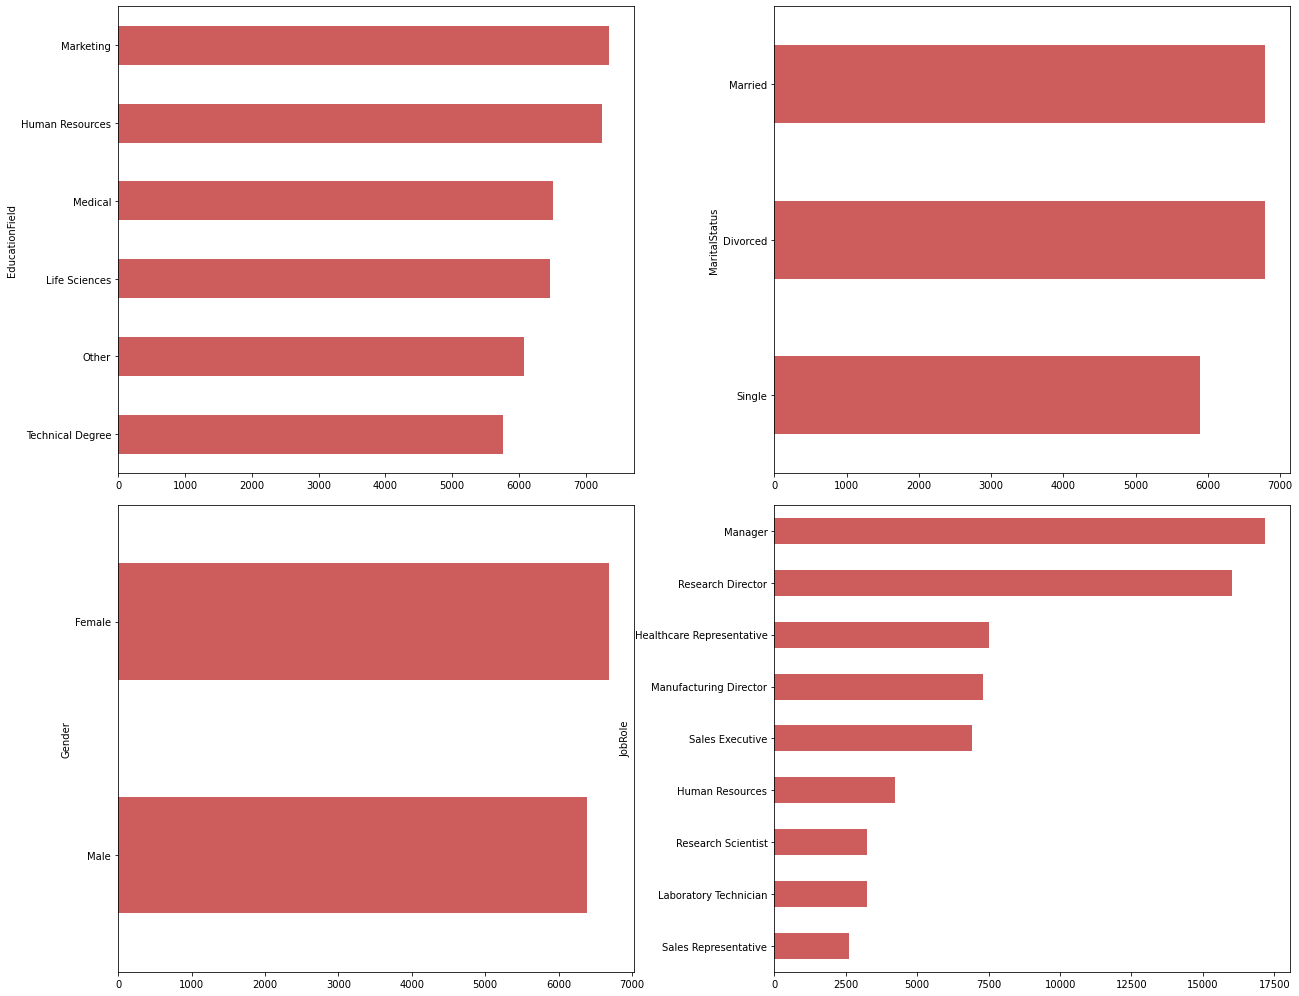

In [15]:
fig, ax = plt.subplots(2,2, figsize = (17,14))
fig.tight_layout(w_pad=11)
axs = ax.ravel()
def income_barplot(ax, predictor):
    df.groupby(by = predictor).mean()['MonthlyIncome'].sort_values().plot.barh(ax = ax, color = 'indianred')

for i,predictor in enumerate(['EducationField','MaritalStatus','Gender','JobRole']):
    income_barplot(axs[i],predictor)

**DECISION TREE**

In [16]:
df["Attrition"].replace(
    {
        0 : "No",
        1 : "Yes"
    },
    inplace = True
)

In [17]:
df["Age"] = pd.qcut(
                df["Age"],
                q = 10,
                labels = False
            )

In [18]:
df["DailyRate"] = pd.qcut(
                df["DailyRate"],
                q = 10,
                labels = False
            )

In [19]:
df["HourlyRate"] = pd.qcut(
                df["HourlyRate"],
                q = 10,
                labels = False
            )

In [20]:
df["MonthlyIncome"] = pd.qcut(
                df["MonthlyIncome"],
                q = 10,
                labels = False
            )

In [21]:
df["MonthlyRate"] = pd.qcut(
                df["MonthlyRate"],
                q = 10,
                labels = False
            )

In [22]:
df["Attrition"].replace(
    {
        "No" : 0,
        "Yes" : 1
    },
    inplace = True
)

In [23]:
df["BusinessTravel"].replace(
    {
        "Travel_Rarely" : 0,
        "Travel_Frequently" : 1,
        "Non-Travel" : 2
    },
    inplace = True
)

In [24]:
df["Department"].replace(
    {
        "Sales" : 0,
        "Research & Development" : 1,
        "Human Resources" : 2
    },
    inplace = True
)

In [25]:
df["EducationField"].replace(
    {
        'Life Sciences' : 0, 
        'Other' : 1, 
        'Medical' : 2, 
        'Marketing' : 3,
        'Technical Degree' : 4,
        'Human Resources' : 5
    },
    inplace = True
)

In [26]:
df["Gender"].replace(
    {
        "Male" : 0,
        "Female" : 1
    },
    inplace = True
)

In [27]:
df["JobRole"].replace(
    {
        'Sales Executive' : 0, 
        'Research Scientist' : 1, 
        'Laboratory Technician' : 2, 
        'Manufacturing Director' : 3,
        'Healthcare Representative' : 4,
        'Manager' : 5,
        'Sales Representative' : 6,
        'Research Director' : 7,
        'Human Resources' : 8
    },
    inplace = True
)

In [28]:
df["MaritalStatus"].replace(
    {
        "Single" : 0,
        "Married" : 1,
        "Divorced" : 2
    },
    inplace = True
)

In [29]:
df["OverTime"].replace(
    {
        "No" : 0,
        "Yes" : 1
    },
    inplace = True
)

In [30]:
df.OverTime.unique()

array([1, 0])

In [31]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,6,1,0,7,0,1,2,0,2,1,8,3,2,0,4,0,6,7,8,1,11,3,1,0,8,0,1,6,4,0,5
1,8,0,1,1,1,8,1,0,3,0,4,2,2,1,2,1,5,9,1,0,23,4,4,1,10,3,3,10,7,1,7
2,5,1,0,9,1,2,2,1,4,0,8,2,1,2,3,0,0,0,6,1,15,3,2,0,7,3,3,0,0,0,0
3,3,0,1,9,1,3,4,0,4,1,3,3,1,1,3,1,2,8,1,1,11,3,3,0,8,3,3,8,7,3,0
4,1,0,0,3,1,2,1,2,1,0,1,3,1,2,2,1,3,5,9,0,12,3,4,1,6,3,3,2,2,2,2


In [32]:
X = df.loc[ : , df.columns != 'Attrition']
y = df['Attrition']

In [33]:
X_train, X_test, y_train , y_test = train_test_split( 
                                        X, 
                                        y, 
                                        test_size = 0.2, 
                                        random_state = 7
                                    )

In [34]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

In [35]:
confusion_matrix(
    y_test,
    y_pred_dt
)

array([[211,  40],
       [ 24,  19]])

In [36]:
accuracy_score(y_test, y_pred_dt)

0.782312925170068

In [37]:
parameters = {
                "criterion" : ["gini", "entropy"],
                "max_depth" : range(10,50,5),
                "min_samples_split" : range(2,5),
                "min_samples_leaf" : range(10,50,5),
            }

grid_obj = GridSearchCV(
                DecisionTreeClassifier(), 
                param_grid = parameters, 
                scoring = make_scorer(accuracy_score),
                n_jobs = -1,
                verbose = 4
            )

grid_fit = grid_obj.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


In [38]:
grid_best = grid_fit.best_estimator_
grid_best.fit(X_train, y_train)
y_pred = grid_best.predict(X_test)

In [39]:
confusion_matrix(
    y_test,
    y_pred
)

array([[244,   7],
       [ 39,   4]])

In [40]:
accuracy_score(y_test, y_pred)

0.8435374149659864

**SVC**

In [41]:
svc=SVC() 
svc.fit(X_train,y_train)


SVC()

In [42]:
y_pred_svc=svc.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred_svc))

Accuracy Score: 0.8537414965986394


In [43]:
print(classification_report(
    y_test,
    y_pred_svc
))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       251
           1       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.85      0.79       294



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
confusion_matrix(
    y_test,
    y_pred_svc
)

array([[251,   0],
       [ 43,   0]])

# **Comparison between SVM and Decision Tree**

In this case, SVM worked better than Decision Tree model obtained from Grid Search, though no parameter tuning was performed in SVM.

**KMEANS**

In [45]:
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    wcss.append(kmeanModel.inertia_)

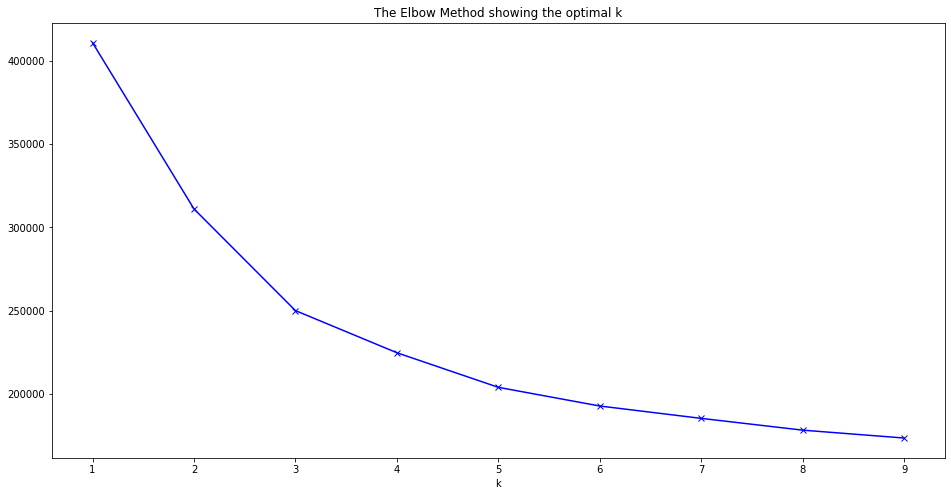

In [46]:
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [47]:
kmeans = KMeans(n_clusters=3).fit(X)
y_kmeans = kmeans.fit_predict(X)
score = silhouette_score(X, y_kmeans)
print(score)

0.24829727897608328


Categorical data is a problem for KMeans algorithm.
The standard k-means algorithm isn't directly applicable to categorical data, for various reasons. The sample space for categorical data is discrete, and doesn't have a natural origin. A Euclidean distance function on such a space isn't really meaningful.
As I have not separated categorical data and numerical data the clustering is not accurate. The accuracy score is not very good.